In [44]:
import numpy as np
import pandas as pd
import seaborn as sns

In [45]:
cost_mu, cost_sigma = 500, 75

def A(t):
    return np.random.normal(cost_mu, cost_sigma)
    return 10

def B(t):
    return np.random.normal(cost_mu * 0.8, cost_sigma)
    return 3

def C(t):
    return np.random.normal(cost_mu * 0.6, cost_sigma)

In [46]:
def getRewards(prices_arr):
    k = [None] * len(prices_arr) 
    for i in range(len(prices_arr)):
        if prices_arr[i] == min(prices_arr):
            k[i] = 1
        #elif prices_arr[i] == max(prices_arr):
            #k[i] = 0
        else:
            k[i] = 0.5
    return k

def bestActionAccumulatedReward(prices_arr):
    return np.max(np.sum(rewards,axis=0))

In [54]:
T = 2000
K = 3

weight=[1,1,1]
prob=[[1] * K for x in range(0,T+2)] # 0: use origin, 1: use card

rewards=[[0,0,0]]

rewards_exp3 = [0]
regrets_exp3 = [0]

actions_exp3=[-1]

gamma = 0.1

z=[]
z_weight=[]

best_action_accumulated_reward = 0

for i in range(1,T+1):
    rewards.append(getRewards([A(i), B(i), C(i)]))
    best_action_accumulated_reward = bestActionAccumulatedReward(rewards[i])
    
    # exp3
    for arm in range(K):
        prob[i][arm] = (1 - gamma)*(weight[arm])/np.sum(weight) + gamma/K
        
    prob[i]=prob[i]/np.sum(prob[i]) 
    print((1 - gamma)*(weight[arm])/np.sum(weight),gamma/K,prob[i])
        
    draw = int(np.random.choice([0,1,2], 1, p=np.array(prob[i]/np.sum(prob[i])) )) # normolize
    
    actions_exp3.append(draw)
    observed_reward = rewards[i][draw]

    rewards_exp3.append(observed_reward) # play arm, get a reward
               
    weak_regret = best_action_accumulated_reward - sum(rewards_exp3) # weak_regret >= 0
    #print(best_action_accumulated_reward -sum(rewards_exp3),"action:", draw)
        
    regrets_exp3.append(weak_regret) # observe a regret

    x = rewards_exp3[i] / prob[i][draw]
    weight[draw] = weight[draw]*np.exp(gamma*x/K)
    weight= weight / np.sum(weight)
    
    #print(weight)
    
    z.append({"t": i, "reward": rewards_exp3[i], "regret": weak_regret,
              "action": draw, "action_group": chr(draw+65) ,"method": "exp3"})
    
    for arm in range(K):
        z_weight.append({"t": i, "weight": weight[arm], "legend": chr(int(arm)+65)})

df=pd.DataFrame(z)
df_weight=pd.DataFrame(z_weight)

0.3 0.03333333333333333 [0.33333333 0.33333333 0.33333333]
0.31008191565218546 0.03333333333333333 [0.32829238 0.32829238 0.34341525]
0.304878309700866 0.03333333333333333 [0.32334255 0.3384458  0.33821164]
0.2997488476365325 0.03333333333333333 [0.31846326 0.34845456 0.33308218]
0.32007822537354774 0.03333333333333333 [0.30880644 0.337782   0.35341156]
0.31473605165737856 0.03333333333333333 [0.31922993 0.33270069 0.34806938]
0.3346074454957969 0.03333333333333333 [0.30952292 0.3225363  0.36794078]
0.3290215840628143 0.03333333333333333 [0.31993667 0.31770841 0.36235492]
0.3235125470829573 0.03333333333333333 [0.3302072  0.31294692 0.35684588]
0.3180808512211528 0.03333333333333333 [0.34033353 0.30825228 0.35141418]
0.31277289420979504 0.03333333333333333 [0.33521049 0.31868329 0.34610623]
0.3075148256758875 0.03333333333333333 [0.34526561 0.31388623 0.34084816]
0.3174889948753322 0.03333333333333333 [0.3400144  0.30916327 0.35082233]
0.3372754992568173 0.03333333333333333 [0.32959718

0.8796462627057956 0.03333333333333333 [0.0447839  0.04223651 0.9129796 ]
0.8800062747715384 0.03333333333333333 [0.04458136 0.04207903 0.91333961]
0.8750487166986421 0.03333333333333333 [0.04958819 0.04202976 0.90838205]
0.8759236660777363 0.03333333333333333 [0.04901819 0.04172481 0.909257  ]
0.876767949603261 0.03333333333333333 [0.04846817 0.04143055 0.91010128]
0.8775826409858187 0.03333333333333333 [0.04793743 0.0411466  0.91091597]
0.8779791285427001 0.03333333333333333 [0.04767913 0.04100841 0.91131246]
0.8787513662353853 0.03333333333333333 [0.04717605 0.04073925 0.9120847 ]
0.8794965346649889 0.03333333333333333 [0.0466906  0.04047954 0.91282987]
0.8798591934054107 0.03333333333333333 [0.04645434 0.04035314 0.91319253]
0.8805655276013259 0.03333333333333333 [0.04599419 0.04010695 0.91389886]
0.8812471007165869 0.03333333333333333 [0.04555017 0.0398694  0.91458043]
0.8815788139300499 0.03333333333333333 [0.04533407 0.03975379 0.91491215]
0.8819046629181279 0.03333333333333333 

0.8924540116011066 0.03333333333333333 [0.04069743 0.03351522 0.92578734]
0.8927187157551276 0.03333333333333333 [0.04043911 0.03350884 0.92605205]
0.8928475566955906 0.03333333333333333 [0.04031337 0.03350574 0.92618089]
0.8929741183097669 0.03333333333333333 [0.04018986 0.03350269 0.92630745]
0.8932205803179617 0.03333333333333333 [0.03994934 0.03349675 0.92655391]
0.8931160328842398 0.03333333333333333 [0.03994857 0.03360207 0.92644937]
0.8932378448265385 0.03333333333333333 [0.03983151 0.03359731 0.92657118]
0.8934750567834504 0.03333333333333333 [0.03960356 0.03358805 0.92680839]
0.8902298598486761 0.03333333333333333 [0.04284968 0.03358713 0.92356319]
0.8905725692350231 0.03333333333333333 [0.04251587 0.03357823 0.9239059 ]
0.8909032596107859 0.03333333333333333 [0.04219377 0.03356964 0.92423659]
0.8912223523304688 0.03333333333333333 [0.04188297 0.03356135 0.92455569]
0.8913776641457103 0.03333333333333333 [0.04173169 0.03355731 0.924711  ]
0.8916801187317249 0.03333333333333333

0.886016021163072 0.03333333333333333 [0.04727215 0.03337849 0.91934935]
0.8865064984586565 0.03333333333333333 [0.04678326 0.03337691 0.91983983]
0.880872687145116 0.03333333333333333 [0.05241735 0.03337663 0.91420602]
0.8815434923198755 0.03333333333333333 [0.05174806 0.03337511 0.91487683]
0.8821907809252774 0.03333333333333333 [0.05110224 0.03337365 0.91552411]
0.8828153767593921 0.03333333333333333 [0.05047905 0.03337223 0.91614871]
0.8827906596903893 0.03333333333333333 [0.05047857 0.03339743 0.91612399]
0.8833942243075344 0.03333333333333333 [0.04987726 0.03339518 0.91672756]
0.8839766279529196 0.03333333333333333 [0.04929702 0.03339301 0.91730996]
0.884538612025114 0.03333333333333333 [0.04873713 0.03339092 0.91787195]
0.8850808919826681 0.03333333333333333 [0.04819687 0.0333889  0.91841423]
0.8853448216973172 0.03333333333333333 [0.04793393 0.03338792 0.91867816]
0.8858588337734116 0.03333333333333333 [0.04742183 0.033386   0.91919217]
0.8800571515725808 0.03333333333333333 [0

0.8969873643085492 0.03333333333333333 [0.03627929 0.03340002 0.9303207 ]
0.8970930534869338 0.03333333333333333 [0.03617594 0.03339768 0.93042639]
0.8971950350952526 0.03333333333333333 [0.03607621 0.03339542 0.93052837]
0.8972934391800488 0.03333333333333333 [0.03597999 0.03339324 0.93062677]
0.8973883912273843 0.03333333333333333 [0.03588713 0.03339114 0.93072172]
0.8974800123226955 0.03333333333333333 [0.03579754 0.03338911 0.93081335]
0.8960253375298326 0.03333333333333333 [0.03725231 0.03338902 0.92935867]
0.8961647738317674 0.03333333333333333 [0.03711482 0.03338707 0.92949811]
0.8962993189009831 0.03333333333333333 [0.03698216 0.03338518 0.92963265]
0.8942351288561842 0.03333333333333333 [0.03904647 0.03338506 0.92756846]
0.8944373607778104 0.03333333333333333 [0.03884606 0.03338325 0.92777069]
0.8946324991831685 0.03333333333333333 [0.03865267 0.0333815  0.92796583]
0.8946014979282061 0.03333333333333333 [0.03865248 0.03341268 0.92793483]
0.8947908789926508 0.03333333333333333

0.8603278176255432 0.03333333333333333 [0.07299764 0.03334121 0.89366115]
0.8617185402654873 0.03333333333333333 [0.07160719 0.03334094 0.89505187]
0.8630605508197411 0.03333333333333333 [0.07026545 0.03334067 0.89639388]
0.8637135856639777 0.03333333333333333 [0.06961254 0.03334054 0.89704692]
0.8649857115362772 0.03333333333333333 [0.06834067 0.03334029 0.89831904]
0.8662132727095759 0.03333333333333333 [0.06711335 0.03334004 0.89954661]
0.866810632336219 0.03333333333333333 [0.06651611 0.03333993 0.90014397]
0.8679742590836744 0.03333333333333333 [0.06535271 0.03333969 0.90130759]
0.8685405156552659 0.03333333333333333 [0.06478657 0.03333958 0.90187385]
0.8696435327720824 0.03333333333333333 [0.06368377 0.03333936 0.90297687]
0.8707079012600691 0.03333333333333333 [0.06261961 0.03333915 0.90404123]
0.8717349735621523 0.03333333333333333 [0.06159275 0.03333895 0.90506831]
0.8727260549225071 0.03333333333333333 [0.06060186 0.03333875 0.90605939]
0.8736824050243094 0.03333333333333333 

0.8998938686892409 0.03333333333333333 [0.03343926 0.03333354 0.9332272 ]
0.8998975921982579 0.03333333333333333 [0.03343554 0.03333353 0.93323093]
0.8998315577462799 0.03333333333333333 [0.03350158 0.03333353 0.93316489]
0.8998312136506273 0.03333333333333333 [0.03350158 0.03333388 0.93316455]
0.8998342009260591 0.03333333333333333 [0.0334986  0.03333387 0.93316753]
0.8998400178109711 0.03333333333333333 [0.0334928  0.03333385 0.93317335]
0.8998428492661745 0.03333333333333333 [0.03348998 0.03333384 0.93317618]
0.8998483627341737 0.03333333333333333 [0.03348448 0.03333382 0.9331817 ]
0.8998536827685327 0.03333333333333333 [0.03347918 0.03333381 0.93318702]
0.8998588161556074 0.03333333333333333 [0.03347406 0.03333379 0.93319215]
0.8998613149084714 0.03333333333333333 [0.03347157 0.03333378 0.93319465]
0.8998637694371517 0.03333333333333333 [0.03346912 0.03333377 0.9331971 ]
0.8998685489449555 0.03333333333333333 [0.03346436 0.03333376 0.93320188]
0.899873160769127 0.03333333333333333 

0.8997695313478681 0.03333333333333333 [0.03356374 0.0333334  0.93310286]
0.8997776170861239 0.03333333333333333 [0.03355566 0.03333339 0.93311095]
0.8997854191464232 0.03333333333333333 [0.03354786 0.03333339 0.93311875]
0.8997929474811642 0.03333333333333333 [0.03354033 0.03333339 0.93312628]
0.8998002116935871 0.03333333333333333 [0.03353307 0.03333339 0.93313355]
0.899803747655793 0.03333333333333333 [0.03352953 0.03333339 0.93313708]
0.8998106329573029 0.03333333333333333 [0.03352265 0.03333338 0.93314397]
0.8998172766963489 0.03333333333333333 [0.03351601 0.03333338 0.93315061]
0.8998236873477957 0.03333333333333333 [0.0335096  0.03333338 0.93315702]
0.8998268078272599 0.03333333333333333 [0.03350648 0.03333338 0.93316014]
0.899832884090327 0.03333333333333333 [0.0335004  0.03333338 0.93316622]
0.8998358418015268 0.03333333333333333 [0.03349745 0.03333338 0.93316918]
0.8998416011182471 0.03333333333333333 [0.03349169 0.03333338 0.93317493]
0.8998471583760648 0.03333333333333333 [

0.899981755713152 0.03333333333333333 [0.03335157 0.03333334 0.93331509]
0.8999823957964964 0.03333333333333333 [0.03335093 0.03333334 0.93331573]
0.8999830134231369 0.03333333333333333 [0.03335031 0.03333334 0.93331635]
0.8999836093809449 0.03333333333333333 [0.03334972 0.03333334 0.93331694]
0.8999838994726163 0.03333333333333333 [0.03334943 0.03333334 0.93331723]
0.8999844643442353 0.03333333333333333 [0.03334886 0.03333334 0.9333178 ]
0.8999850093978794 0.03333333333333333 [0.03334832 0.03333334 0.93331834]
0.8999855353288426 0.03333333333333333 [0.03334779 0.03333334 0.93331887]
0.8999860428080253 0.03333333333333333 [0.03334728 0.03333334 0.93331938]
0.8999865324827903 0.03333333333333333 [0.03334679 0.03333334 0.93331987]
0.8999870049777877 0.03333333333333333 [0.03334632 0.03333334 0.93332034]
0.8999874608957531 0.03333333333333333 [0.03334587 0.03333334 0.93332079]
0.8999879008182752 0.03333333333333333 [0.03334543 0.03333334 0.93332123]
0.8999883253065386 0.03333333333333333 

0.899998746130803 0.03333333333333333 [0.03333458 0.03333334 0.93333208]
0.8999979343934887 0.03333333333333333 [0.0333354  0.03333334 0.93333127]
0.8999980068633396 0.03333333333333333 [0.03333532 0.03333334 0.93333134]
0.8999980767906544 0.03333333333333333 [0.03333525 0.03333334 0.93333141]
0.8999981442646354 0.03333333333333333 [0.03333519 0.03333334 0.93333148]
0.8999982093713559 0.03333333333333333 [0.03333512 0.03333334 0.93333154]
0.8999982721938685 0.03333333333333333 [0.03333506 0.03333334 0.93333161]
0.8999983328123129 0.03333333333333333 [0.033335   0.03333334 0.93333167]
0.8999983913040166 0.03333333333333333 [0.03333494 0.03333334 0.93333172]
0.8999984477435942 0.03333333333333333 [0.03333488 0.03333334 0.93333178]
0.8999985022030424 0.03333333333333333 [0.03333483 0.03333334 0.93333184]
0.8999985287120239 0.03333333333333333 [0.0333348  0.03333334 0.93333186]
0.8999985803307715 0.03333333333333333 [0.03333475 0.03333334 0.93333191]
0.8999986301385243 0.03333333333333333 

0.8999997900338174 0.03333333333333333 [0.03333354 0.03333333 0.93333312]
0.8999997974002826 0.03333333333333333 [0.03333354 0.03333333 0.93333313]
0.8999998009860238 0.03333333333333333 [0.03333353 0.03333333 0.93333313]
0.8999998079682411 0.03333333333333333 [0.03333353 0.03333333 0.93333314]
0.8999998147054941 0.03333333333333333 [0.03333352 0.03333333 0.93333315]
0.8999998212063768 0.03333333333333333 [0.03333351 0.03333333 0.93333315]
0.8999998274791822 0.03333333333333333 [0.03333351 0.03333333 0.93333316]
0.8999998335319122 0.03333333333333333 [0.0333335  0.03333333 0.93333317]
0.8999998393722878 0.03333333333333333 [0.03333349 0.03333333 0.93333317]
0.8999998422151813 0.03333333333333333 [0.03333349 0.03333333 0.93333318]
0.8999998477509126 0.03333333333333333 [0.03333349 0.03333333 0.93333318]
0.8999998530924281 0.03333333333333333 [0.03333348 0.03333333 0.93333319]
0.8999998556924934 0.03333333333333333 [0.03333348 0.03333333 0.93333319]
0.8999998556232316 0.03333333333333333

0.8999999698788936 0.03333333333333333 [0.03333336 0.03333333 0.9333333 ]
0.8999999709356642 0.03333333333333333 [0.03333336 0.03333333 0.9333333 ]
0.899999971955359 0.03333333333333333 [0.03333336 0.03333333 0.93333331]
0.8999999729392788 0.03333333333333333 [0.03333336 0.03333333 0.93333331]
0.8999999738886786 0.03333333333333333 [0.03333336 0.03333333 0.93333331]
0.8999999737965108 0.03333333333333333 [0.03333336 0.03333333 0.93333331]
0.8999999747158354 0.03333333333333333 [0.03333336 0.03333333 0.93333331]
0.8999999756029065 0.03333333333333333 [0.03333336 0.03333333 0.93333331]
0.8999999764588554 0.03333333333333333 [0.03333336 0.03333333 0.93333331]
0.8999999772847743 0.03333333333333333 [0.03333336 0.03333333 0.93333331]
0.8999999776868032 0.03333333333333333 [0.03333336 0.03333333 0.93333331]
0.8999999784696405 0.03333333333333333 [0.03333335 0.03333333 0.93333331]
0.8999999788506988 0.03333333333333333 [0.03333335 0.03333333 0.93333331]
0.8999999795927022 0.03333333333333333 

<AxesSubplot:xlabel='t', ylabel='regret'>

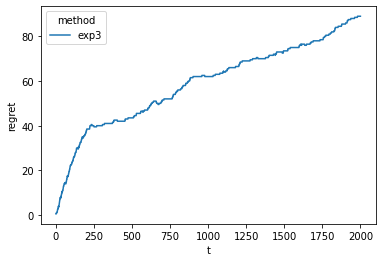

In [55]:
sns.lineplot(x="t",y="regret",data=df,hue="method")

<AxesSubplot:xlabel='t', ylabel='weight'>

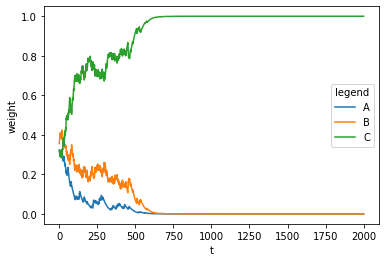

In [53]:
sns.lineplot(x="t",y="weight",data=df_weight,hue="legend")